In [17]:
!pip install mysql-connector-python

In [20]:
import mysql.connector

In [19]:
import pandas as pd
import numpy as np
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [27]:
import mysql.connector

# Connect to the MySQL database
con = mysql.connector.connect(
    host='127.0.0.1',
    user='root',
    password='WJ28@krhps',
)

cur = con.cursor()
q1 = "CREATE DATABASE IF NOT EXISTS order_analysis"
cur.execute(q1)
cur.execute("USE order_analysis")
con.commit()

In [37]:
# read dataset
df=pd.read_csv('orders.csv')
df.head(20)

#read data from file and handle null values
# df=pd.read_csv('orders.csv',na_values=['Not Available','unknown'])

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5
5,6,2022-03-13,Not Available,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,FUR-FU-10001487,50,50,7,3
6,7,2022-12-28,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,OFF-AR-10002833,10,10,4,3
7,8,2022-01-25,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,TEC-PH-10002275,860,910,6,5
8,9,2023-03-23,Not Available,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,OFF-BI-10003910,20,20,3,2
9,10,2023-05-16,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,OFF-AP-10002892,90,110,5,3


In [38]:
df['Ship Mode'].replace(['Not Available','unknown'],np.nan, inplace=True)

df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', nan, 'First Class', 'Same Day'],
      dtype=object)

In [39]:
# rename columns names
# make them lower case and replace space with underscore
# df.rename(columns={'Order Id':'order_id','City':'city'},inplace=True)

df.columns=df.columns.str.lower()
df.columns=df.columns.str.replace(' ','_')

In [40]:
df.head()

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,cost_price,list_price,quantity,discount_percent
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5


In [41]:
# Converted the 'order_date' column to datetime format for time-based analysis, and checked data types to validate conversion.
df['order_date']=pd.to_datetime(df['order_date'],format="%Y-%m-%d")
df.dtypes

order_id                     int64
order_date          datetime64[ns]
ship_mode                   object
segment                     object
country                     object
city                        object
state                       object
postal_code                  int64
region                      object
category                    object
sub_category                object
product_id                  object
cost_price                   int64
list_price                   int64
quantity                     int64
discount_percent             int64
dtype: object

In [42]:
# derive new columns discount, sale price and profit
df['discount']=df['list_price']*df['discount_percent']*0.01

df['sale_price']=df['list_price']-df['discount']

df['profit']=df['sale_price']-df['cost_price']

In [43]:
# drop cost_price,list_price and discount percent column
df.drop(columns=['cost_price','list_price','discount_percent'],inplace=True)

In [45]:
df.head()

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,quantity,discount,sale_price,profit
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,2,5.2,254.8,14.8
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,3,21.9,708.1,108.1
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,2,0.5,9.5,-0.5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,5,19.2,940.8,160.8
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,2,1.0,19.0,-1.0


In [46]:
def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

In [47]:
# Set table name
table_name = 'order_table'

In [48]:
# Generate CREATE TABLE query
columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
cur.execute(create_table_query)
con.commit()

In [49]:
# Insert each row into the table
for _, row in df.iterrows():
    values = tuple(None if pd.isna(x) else x for x in row)
    placeholders = ', '.join(['%s'] * len(row))
    insert_query = f"INSERT INTO `{table_name}` ({', '.join([f'`{col}`' for col in df.columns])}) VALUES ({placeholders})"
    cur.execute(insert_query, values)

In [50]:
# Commit and close connection
con.commit()
# cur.close()
# con.close()

# print(f" Data inserted into MySQL table '{table_name}' successfully.")

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_id      9994 non-null   int64         
 1   order_date    9994 non-null   datetime64[ns]
 2   ship_mode     9988 non-null   object        
 3   segment       9994 non-null   object        
 4   country       9994 non-null   object        
 5   city          9994 non-null   object        
 6   state         9994 non-null   object        
 7   postal_code   9994 non-null   int64         
 8   region        9994 non-null   object        
 9   category      9994 non-null   object        
 10  sub_category  9994 non-null   object        
 11  product_id    9994 non-null   object        
 12  quantity      9994 non-null   int64         
 13  discount      9994 non-null   float64       
 14  sale_price    9994 non-null   float64       
 15  profit        9994 non-null   float64 

In [52]:
df.to_csv('retail_orders_output2.csv', index=False)

In [53]:
# Create a cursor and execute the query
query = "SELECT * FROM order_table;"
d = pd.read_sql(query, con)  # Load directly into a DataFrame

# Display the result
d.head()

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,quantity,discount,sale_price,profit
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,2,5.2,254.8,14.8
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,3,21.9,708.1,108.1
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,2,0.5,9.5,-0.5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,5,19.2,940.8,160.8
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,2,1.0,19.0,-1.0


In [ ]:
# SQL query to count total orders
query = "SELECT COUNT(*) AS total_orders FROM order_table;"
cur.execute(query)

# Fetch and print result
total_orders = cur.fetchone()[0]
print("Total Orders:", total_orders)

In [54]:
# SQL query to calculate total revenue
query = "SELECT SUM(sale_price) AS total_revenue FROM order_table;"
cur.execute(query)

# Fetch and print result
total_revenue = cur.fetchone()[0]
print("Total Revenue:", total_revenue)

Total Revenue: 2215858.699084282


In [55]:
# Define query
query = """
SELECT Category, COUNT(*) AS total_orders
FROM order_table
GROUP BY Category;
"""

cur.execute(query)
data = cur.fetchall()
d = pd.DataFrame(data, columns=("Category", "total order"))
d

,Category,total order
0,Furniture,2121
1,Office Supplies,6026
2,Technology,1847


In [ ]:
# SQL query for monthly sales trend
query = """
SELECT DATE_FORMAT(Order_Date, '%Y-%m') AS month, SUM(sale_price) AS monthly_sales
FROM order_table
GROUP BY month
ORDER BY month;
"""

cur.execute(query)
data = cur.fetchall()

# Create DataFrame from fetched data
d = pd.DataFrame(data, columns=["Month", "Monthly Sales"])
d


In [56]:
# SQL query to count orders by day
query = """
SELECT Order_Date, COUNT(*) AS order_count
FROM order_table
GROUP BY Order_Date
ORDER BY Order_Date;
"""

cur.execute(query)
data = cur.fetchall()

# Create DataFrame
d = pd.DataFrame(data, columns=["Order Date", "Order Count"])
d


,Order Date,Order Count
0,2022-01-01,16
1,2022-01-02,17
2,2022-01-03,16
3,2022-01-04,21
4,2022-01-05,13
...,...,...
725,2023-12-27,7
726,2023-12-28,15
727,2023-12-29,17
728,2023-12-30,18


,City,Total Revenue
0,New York City,247205.699916
1,Los Angeles,169758.399735
2,Seattle,115358.699701
3,San Francisco,108890.099939
4,Philadelphia,105258.299792


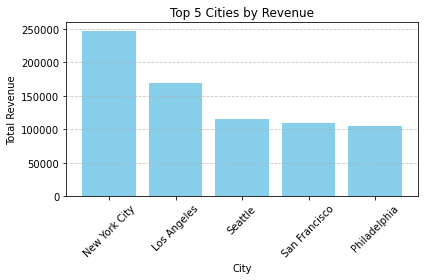

In [57]:
query = """
SELECT City, SUM(sale_price) AS total_revenue
FROM order_table
GROUP BY City
ORDER BY total_revenue DESC
LIMIT 5;
"""

cur.execute(query)
data = cur.fetchall()

# Create DataFrame
d = pd.DataFrame(data, columns=["City", "Total Revenue"])

# Display DataFrame
display(d)

# Plotting
plt.figure(figsize=(6,4))
plt.bar(d["City"], d["Total Revenue"], color="skyblue")
plt.title("Top 5 Cities by Revenue")
plt.xlabel("City")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

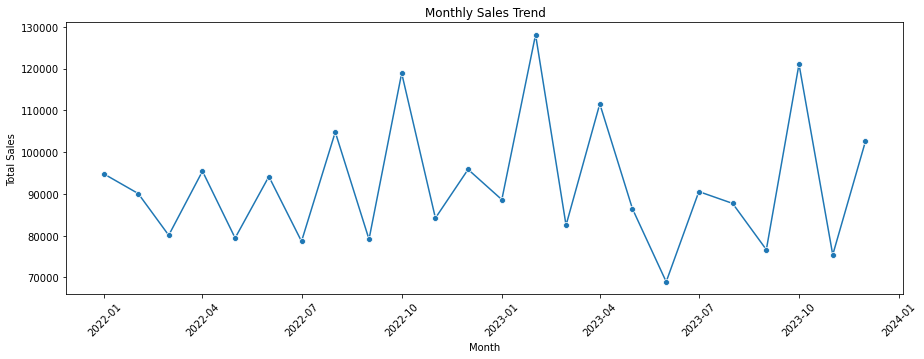

In [58]:
sales_trend = df.groupby(df['order_date'].dt.to_period('M'))['sale_price'].sum().reset_index()
# display(sales_trend)  #2022-02
sales_trend['order_date'] = sales_trend['order_date'].dt.to_timestamp()

plt.figure(figsize=(15, 5))
sns.lineplot(data=sales_trend, x='order_date', y='sale_price', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)

plt.show()
# sales_trend

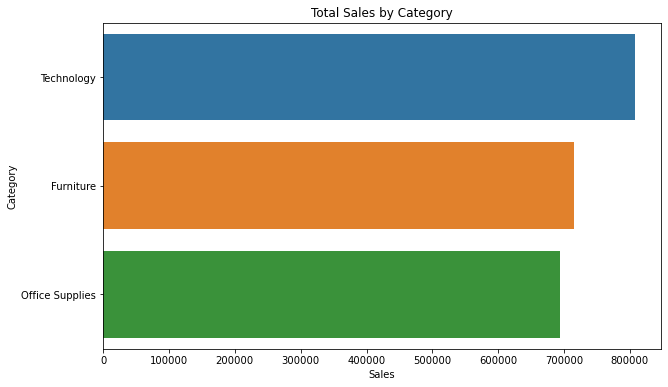

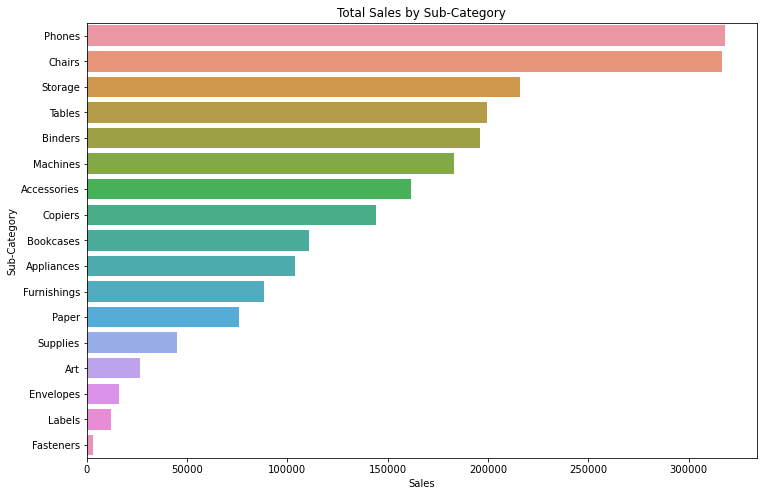

In [60]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df.groupby('category')['sale_price'].sum().reset_index().sort_values('sale_price', ascending=False),
            x='sale_price', y='category')
plt.title('Total Sales by Category')
plt.xlabel('Sales')
plt.ylabel('Category')
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(data=df.groupby('sub_category')['sale_price'].sum().reset_index().sort_values('sale_price', ascending=False),
            x='sale_price', y='sub_category')
plt.title('Total Sales by Sub-Category')
plt.xlabel('Sales')
plt.ylabel('Sub-Category')
plt.show()

In [61]:
df

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,quantity,discount,sale_price,profit
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,2,5.2,254.8,14.8
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,3,21.9,708.1,108.1
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,2,0.5,9.5,-0.5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,5,19.2,940.8,160.8
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,2,1.0,19.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,2023-02-18,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,FUR-FU-10001889,3,1.2,28.8,-1.2
9990,9991,2023-03-17,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,FUR-FU-10000747,2,3.6,86.4,16.4
9991,9992,2022-08-07,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,TEC-PH-10003645,2,5.2,254.8,34.8
9992,9993,2022-11-19,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,OFF-PA-10004041,4,0.9,29.1,-0.9


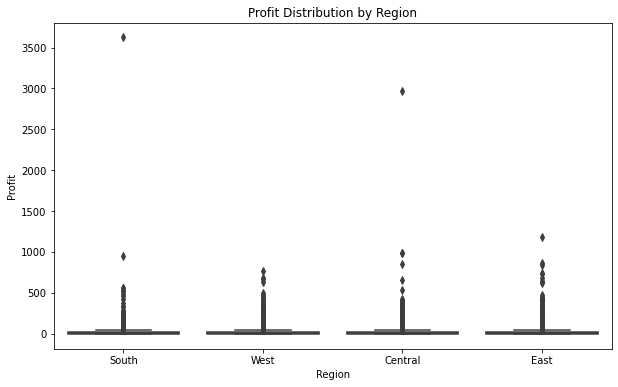

In [62]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='region', y='profit')
plt.title('Profit Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Profit')
plt.show()

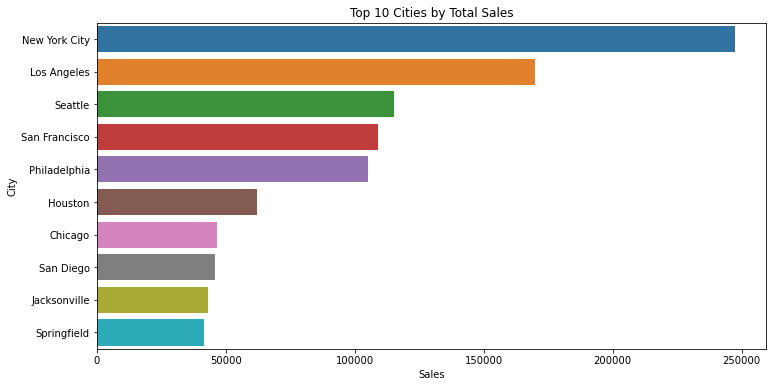

,city,sale_price
0,New York City,247205.7
1,Los Angeles,169758.4
2,Seattle,115358.7
3,San Francisco,108890.1
4,Philadelphia,105258.3
5,Houston,62259.4
6,Chicago,46743.4
7,San Diego,45641.9
8,Jacksonville,43038.6
9,Springfield,41665.5


In [63]:
top_cities = df.groupby('city')['sale_price'].sum().nlargest(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=top_cities, x='sale_price', y='city')
plt.title('Top 10 Cities by Total Sales')
plt.xlabel('Sales')
plt.ylabel('City')
plt.show()
top_cities

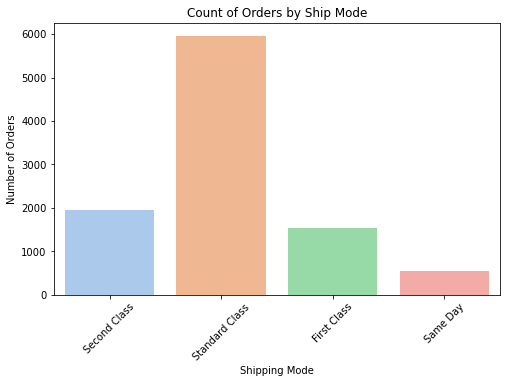

In [64]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='ship_mode', palette='pastel')
plt.title('Count of Orders by Ship Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

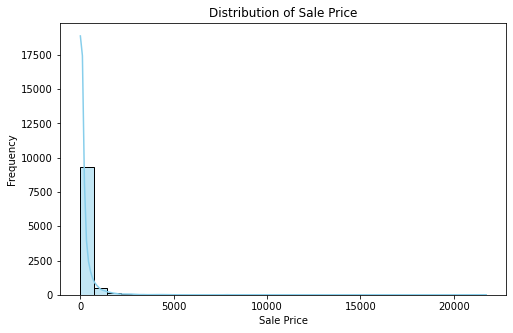

In [65]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='sale_price', bins=30, kde=True, color='skyblue')
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

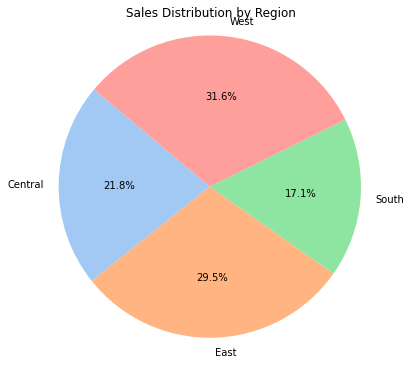

In [66]:
region_sales = df.groupby('region')['sale_price'].sum()

plt.figure(figsize=(6, 6))
plt.pie(region_sales, labels=region_sales.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Sales Distribution by Region')
plt.axis('equal')
plt.show()

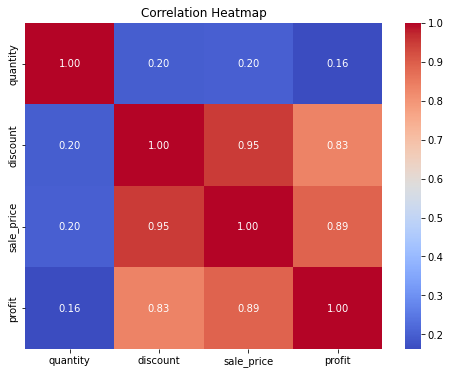

In [67]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['quantity', 'discount', 'sale_price', 'profit']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()